In [9]:
import ftplib
import os

ESA_FTP_HOST = "science-pds.cryosat.esa.int"
USERNAME = "username"
PASSWORD = "password"

YEARS = [2015]       # years I have so far
MONTHS = list(range(1,13)) # months 1-12
for YEAR in YEARS:
    for MONTH in MONTHS:
        BASE_PATH = f"TEMPO_SWATH_GRID/{YEAR}/{MONTH:02d}/ANTARCTIC"
        LOCAL_DIR = "./cryosat_downloads"

#os.makedirs(LOCAL_DIR, exist_ok=True) #uncomment to make a new directory to store files in

# Connect securely
        ftps = ftplib.FTP_TLS(ESA_FTP_HOST)
        ftps.login(USERNAME, PASSWORD)
        ftps.prot_p()
        ftps.set_pasv(True)

        print("Connected.")

# Change directory instead of nlst(full_path)
        ftps.cwd(BASE_PATH)

        files = ftps.nlst()

        if not files:
            print("No files found.")
        else:
            for fname in files:
                if fname.endswith(".nc"):
                    local_file = os.path.join(LOCAL_DIR, fname)

            # Skip if already downloaded
                    if os.path.exists(local_file):
                        print(f"Skipping {fname} (already exists)")
                        continue

                    print(f"Downloading {fname}")
                    with open(local_file, "wb") as f:
                        ftps.retrbinary(f"RETR {fname}", f.write)

        print("Done.")
        ftps.quit()


Connected.
Skipping CS_OFFL_THEM_GRID__ANTARCTIC_2015_01_V201.nc (already exists)
Done.
Connected.
Skipping CS_OFFL_THEM_GRID__ANTARCTIC_2015_02_V201.nc (already exists)
Done.
Connected.
Skipping CS_OFFL_THEM_GRID__ANTARCTIC_2015_03_V201.nc (already exists)
Done.
Connected.
Skipping CS_OFFL_THEM_GRID__ANTARCTIC_2015_04_V201.nc (already exists)
Done.
Connected.
Skipping CS_OFFL_THEM_GRID__ANTARCTIC_2015_05_V201.nc (already exists)
Done.
Connected.
Skipping CS_OFFL_THEM_GRID__ANTARCTIC_2015_06_V201.nc (already exists)
Done.
Connected.
Skipping CS_OFFL_THEM_GRID__ANTARCTIC_2015_07_V203.nc (already exists)
Done.
Connected.
Skipping CS_OFFL_THEM_GRID__ANTARCTIC_2015_08_V201.nc (already exists)
Done.
Connected.
Skipping CS_OFFL_THEM_GRID__ANTARCTIC_2015_09_V201.nc (already exists)
Done.
Connected.
Skipping CS_OFFL_THEM_GRID__ANTARCTIC_2015_10_V201.nc (already exists)
Done.
Connected.
Done.
Connected.
Done.


In [47]:
import xarray as xr

file = "C:/Users/Ashley Howard/ESS569/MLGEO2026_Subglacial_Lakes/Notebooks/cryosat_downloads/CS_OFFL_THEM_GRID__ANTARCTIC_2018_08_V201.nc"
ds = xr.open_dataset(file)

print(ds)


<xarray.Dataset> Size: 52MB
Dimensions:      (x: 2750, y: 2350, time: 1, nv: 2)
Coordinates:
  * x            (x) float32 11kB -2.699e+06 -2.697e+06 ... 2.797e+06 2.799e+06
  * y            (y) float32 9kB -2.399e+06 -2.397e+06 ... 2.297e+06 2.299e+06
  * time         (time) int32 4B 1534291200
  * nv           (nv) int32 8B 0 1
Data variables:
    elevation    (x, y, time) float32 26MB ...
    uncertainty  (x, y, time) float32 26MB ...
    x_bnds       (x, nv) float32 22kB ...
    y_bnds       (y, nv) float32 19kB ...
Attributes: (12/35)
    cdm_data_type:                Gridded
    Conventions:                  CF-1.7
    Metadata_Conventions:         Unidata Dataset Discovery v1.0
    contact:                      support@cryotempo-eolis.org
    creator_email:                support@cryotempo-eolis.org
    creator_url:                  http://cryotempo-eolis.org/
    ...                           ...
    project:                      CryoTEMPO-EOLIS, which is an evolution of C...
  

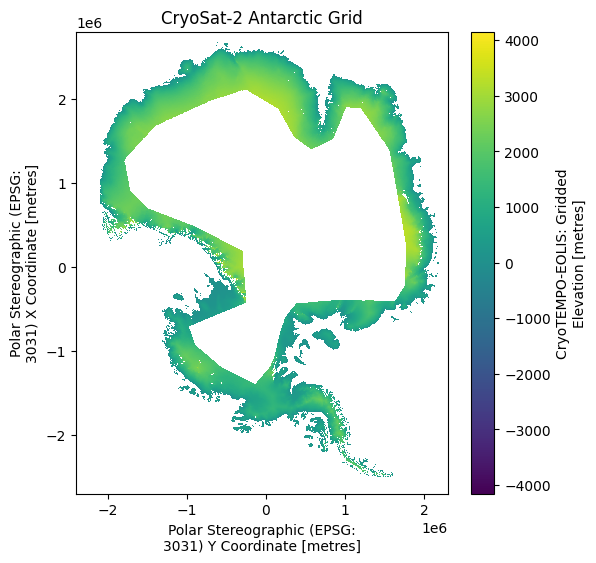

In [48]:
import matplotlib.pyplot as plt

var = ds[list(ds.data_vars)[0]]  

plt.figure(figsize=(6,6))
var.isel(time=0).plot(cmap="viridis")
plt.title("CryoSat-2 Antarctic Grid")
plt.show()


In [ ]:
import rioxarray as rxr

rema = rxr.open_rasterio(
    "rema_100m.tif",
    masked=True
).squeeze()

print(rema)

RasterioIOError: rema_100m.tif: No such file or directory